#Perguntas que queremos responder:
- Quem sobreviveu mais ? Homem ou Mulher ?
- Qual foi o maior e menor valor pago para embarcar ?
- Pessoas da 1ª Classe sobreviveram mais que as outras ?
- O porto de embarque teve influencia na taxa de sobrevivência ?
- O título dos passageiros, influenciaram na sobrevivência ?
- Dentro da mesma classe, quem pagou mais teve maior chance de sobreviver?


In [163]:
# Importando as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


sns.set_palette(palette='dark')

In [164]:
#Importanto as duas bases ( Treino e Teste )
base_train = pd.read_csv('titanic_train.csv')
base_test = pd.read_csv('titanic_test.csv')

In [165]:
# Concatenando as bases de treino e teste
base = pd.concat([base_train, base_test], ignore_index = True)

In [166]:
base.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
base.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [168]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [169]:
base.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#Iniciando Tratativa dos dados

In [170]:
base.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [171]:
# A variável Cabin possui muitos valores nulos e é irrelevante pro modelo pois são dados que possuem alta cardinalidade, então aproveitaremos para tirá-lo da base de uma vez.
base = base.drop('Cabin', axis=1)

In [172]:
# Verificamos as duas ocorrências que a variável Embarked é NaN e tratamos
base.loc[base['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [173]:
# Atribuimos o porto S as duas pessoas que estavam faltando ( O valor foi identificado pesquisando os nomes no Google e descobrindo que o embarque foram no mesmo porto)
base.loc[[61,829],'Embarked'] = 'S'

In [174]:
# Localizamos a coluna Fare com o único valor null
base.loc[base['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [175]:
# Pesquisando no google dá pra saber que a pessoa de nome Storey, Mr. Thomas pagou £7
base.loc[1043,'Fare'] = 7

In [176]:
# Preenchemos os valores nulos com base na média do Pclass e Sex
base['Age'] = base['Age'].fillna(
                  base.groupby(['Pclass','Sex'])['Age']
                  .transform('mean'))

In [177]:
# Verificamos se possui mais algum valor nulo
base.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [178]:
# Iremos criar uma nova coluna com apenas os títulos dos passageiros
base['Title'] = base['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Colocar o Título ao lado do Nome dos passageiros
idx = base.columns.get_loc('Name')
base.insert(loc=idx+1, column='Title', value=base.pop('Title'))

#Análise dos dados tratados e respostas das perguntas

In [179]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Title        1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1309 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1309 non-null   float64
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [180]:
base.shape

(1309, 12)

In [181]:
# Taxa de sobrevivencia por Sexo
base.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           385
male    0           734
        1           109
dtype: int64

Text(0, 0.5, 'Quantidade')

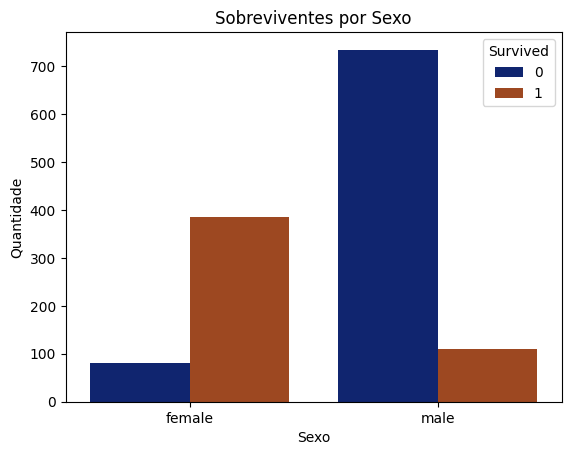

In [182]:
df_plot = base.groupby(['Sex', 'Survived']).size().reset_index(name='Contagem')
sns.barplot(data=df_plot, x='Sex', y='Contagem', hue='Survived')

plt.title('Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

In [183]:
# Obtemos o valor minimo e máximo e colocamos em um dataframe para melhor visualizar
fare_max = base.Fare.max()
fare_min = base.Fare.min()

df_min_max_fare = pd.DataFrame(
    {'Valor':[fare_max, fare_min]},
    index=['Maior_Valor', 'Menor_Valor'])

df_min_max_fare

,Valor
Maior_Valor,512.3292
Menor_Valor,0.0000


In [184]:
# Localizamos as linhas com os menores valores da coluna Fare
menor_valor = base['Fare'].min()
embarques_menor_valor = base[base['Fare'] == menor_valor]
embarques_menor_valor

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",Mr,male,36.000000,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",Mr,male,40.000000,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",Mr,male,25.000000,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",Mr,male,30.815380,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",Mr,male,19.000000,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",Mr,male,30.815380,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",Mr,male,30.815380,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",Mr,male,30.815380,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",Mr,male,49.000000,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",Mr,male,41.029272,0,0,112052,0.0,S


In [185]:
# Localizamos as linhas com os maiores valores da coluna Fare
maior_valor = base['Fare'].max()
embarques_maior_valor = base[base['Fare'] == maior_valor]
embarques_maior_valor

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",Miss,female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",Mr,male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",Mr,male,35.0,0,0,PC 17755,512.3292,C
1234,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",Mrs,female,58.0,0,1,PC 17755,512.3292,C


In [186]:
# Fazemos um agrupamento por Classe
contagem = base.groupby(['Pclass','Survived']).size().reset_index(name='Contagem')
total_por_pclass = contagem.groupby('Pclass')['Contagem'].transform('sum')
contagem['% Surv by Class'] = contagem['Contagem'] / total_por_pclass * 100
contagem.set_index(['Pclass','Survived','Contagem','% Surv by Class'], inplace=True)

contagem

Empty DataFrame
Columns: []
Index: [(1, 0, 137, 42.414860681114554), (1, 1, 186, 57.585139318885446), (2, 0, 160, 57.761732851985556), (2, 1, 117, 42.238267148014444), (3, 0, 518, 73.06064880112835), (3, 1, 191, 26.939351198871652)]

Text(0, 0.5, 'Quantidade')

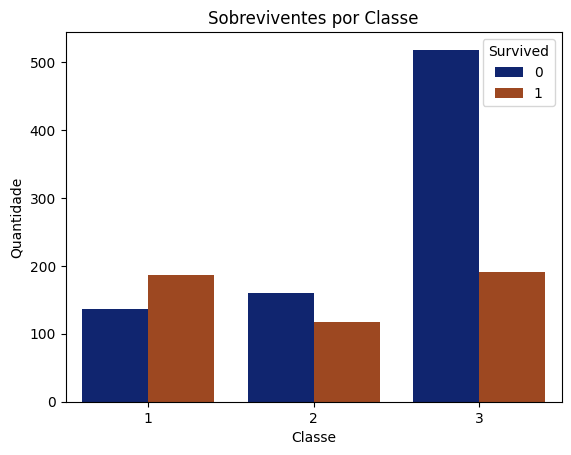

In [187]:
df_plot_survive = base.groupby(['Pclass', 'Survived']).size().reset_index(name='Contagem')
sns.barplot(data=df_plot_survive, x='Pclass', y='Contagem', hue='Survived')

plt.title('Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade')

In [188]:
# Quantidade de sobreviventes de cada porto embarcado
base.groupby('Embarked')['Survived'].value_counts().loc[:, 1].sort_values(ascending=False)

,count
Embarked,
S,307
C,133
Q,54


Text(0, 0.5, 'Quantidade')

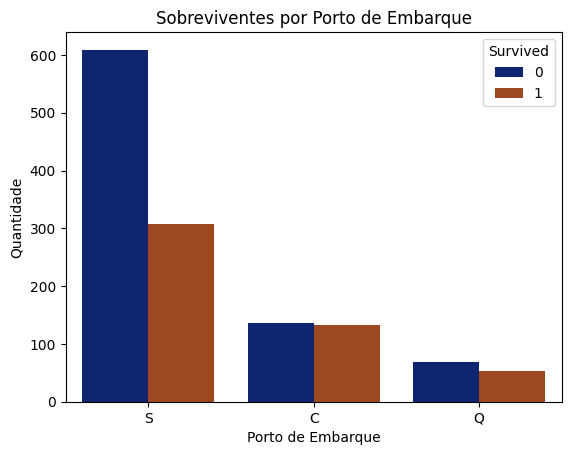

In [189]:
# Gráfico de taxa de sobrevivência por porto de embarque
sns.countplot(data=base, x='Embarked', hue='Survived')

plt.title('Sobreviventes por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Quantidade')

<Axes: xlabel='Pclass', ylabel='Fare'>

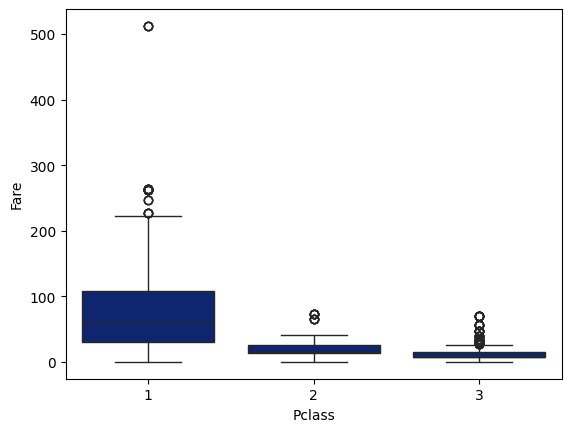

In [190]:
sns.boxplot(data=base, x='Pclass', y='Fare')

In [191]:
base.groupby(['Title','Survived']).size()

Title     Survived
Capt      0             1
Col       0             3
          1             1
Countess  1             1
Don       0             1
Dona      1             1
Dr        0             5
          1             3
Jonkheer  0             1
Lady      1             1
Major     0             1
          1             1
Master    0            38
          1            23
Miss      0            55
          1           205
Mlle      1             2
Mme       1             1
Mr        0           676
          1            81
Mrs       0            26
          1           171
Ms        1             2
Rev       0             8
Sir       1             1
dtype: int64

In [192]:
# Tiramos os principais titulos recorrentes e vemos como foi a taxa de sobrevivência

titulos_excluir = ["Mr", "Miss", "Mrs"]
base_filtrado = base.query('Title not in @titulos_excluir')

(
    base_filtrado
    .groupby('Title')['Survived']
    .value_counts()
    .unstack(fill_value=0)
    .assign(Total=lambda df: df[0] + df[1])
    .sort_values(by='Total', ascending=False).T
)

Title,Master,Rev,Dr,Col,Mlle,Major,Ms,Jonkheer,Dona,Don,Countess,Capt,Lady,Mme,Sir
Survived,,,,,,,,,,,,,,,
0,38,8,5,3,0,1,0,1,0,1,0,1,0,0,0
1,23,0,3,1,2,1,2,0,1,0,1,0,1,1,1
Total,61,8,8,4,2,2,2,1,1,1,1,1,1,1,1


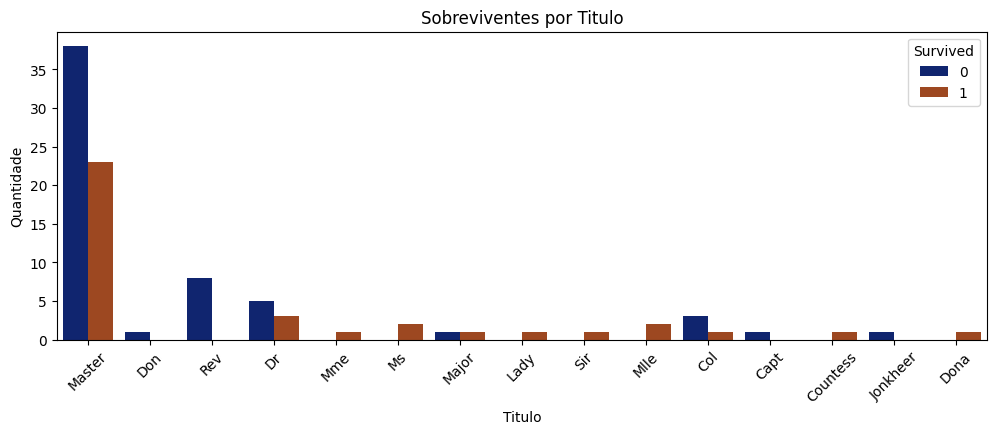

In [193]:
plt.figure(figsize=(12, 4))
sns.countplot(data=base_filtrado, x='Title', hue='Survived')

plt.title('Sobreviventes por Titulo')
plt.xlabel('Titulo')
plt.ylabel('Quantidade')
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Correlação entre as variáveis')

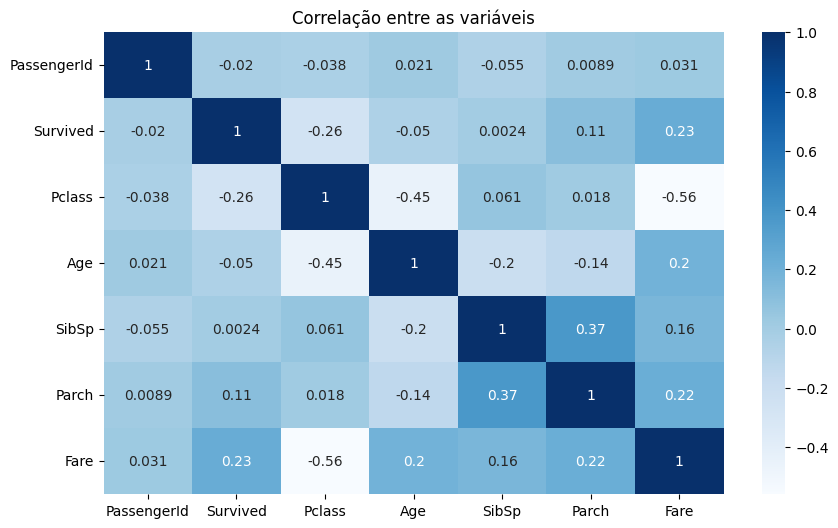

In [194]:
# Gráfico de correlação das variáveis
plt.figure(figsize=(10, 6))
sns.heatmap(data = base.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlação entre as variáveis')

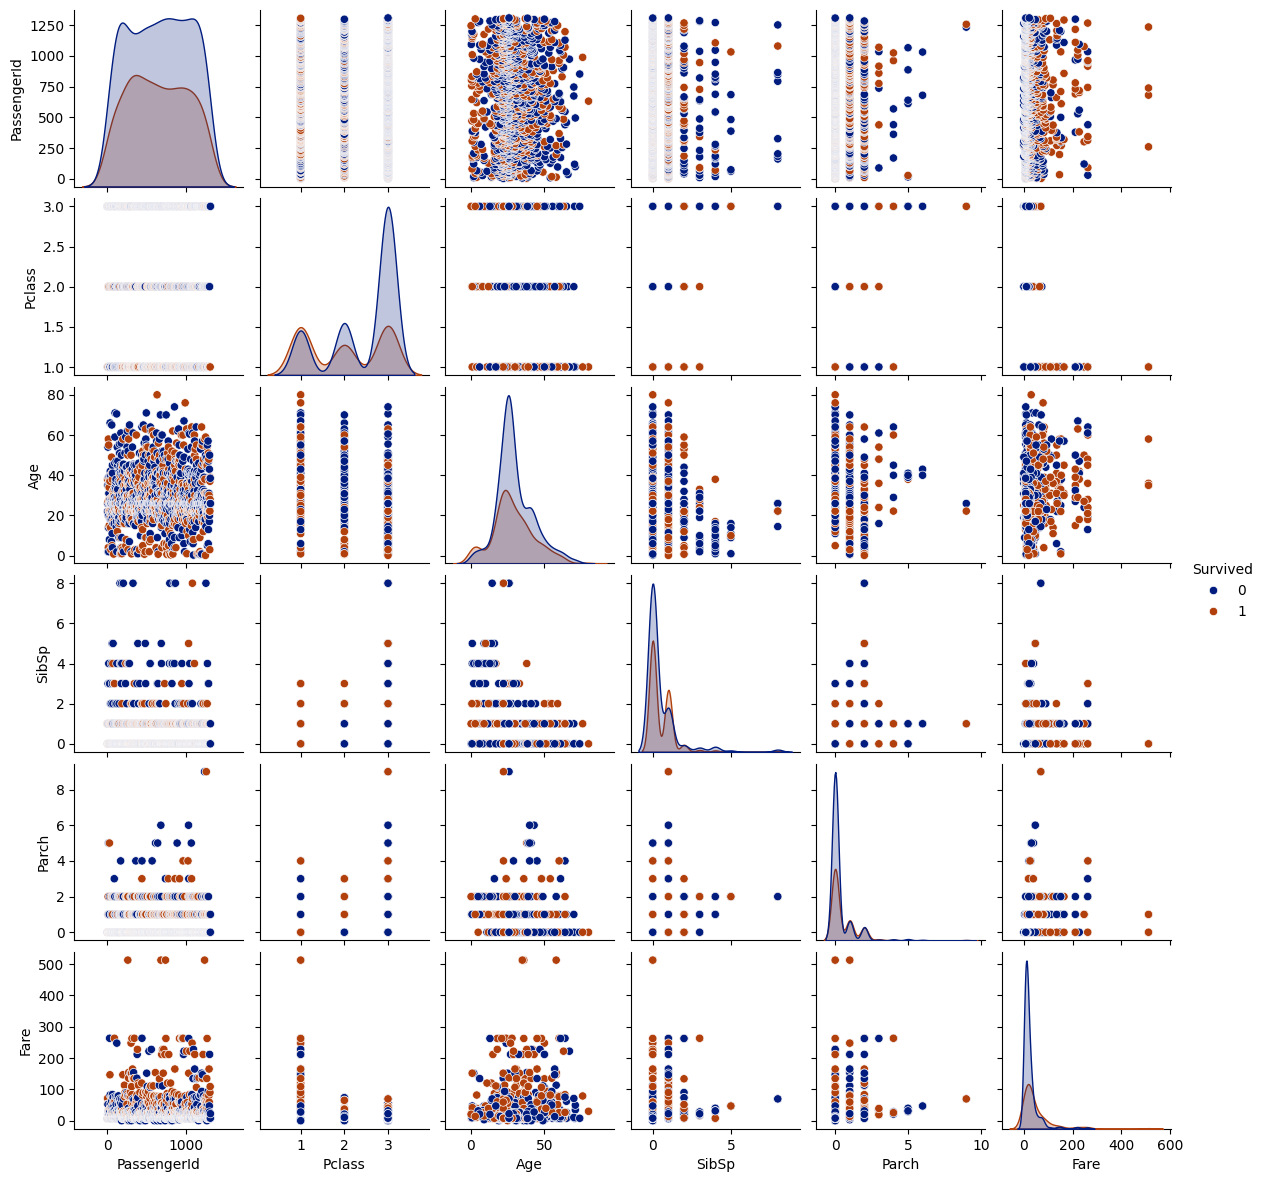

In [195]:
sns.pairplot(data=base, hue='Survived', height=2)

/tmp/ipython-input-196-3540148833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Fare_Group'] = df_filtrado.groupby('Pclass')['Fare'].transform(
/tmp/ipython-input-196-3540148833.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobrevivencia_por_faixa = df_filtrado.groupby(['Pclass', 'Fare_Group'])['Survived'].mean().reset_index()


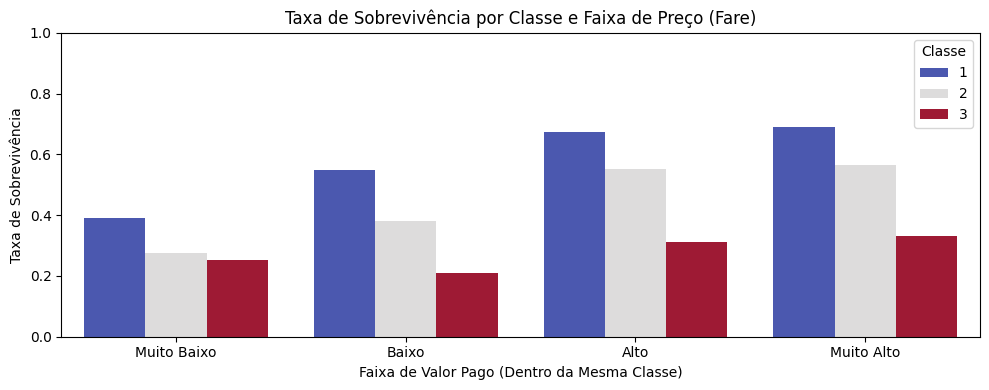

In [196]:
df_filtrado = base[['Pclass', 'Fare', 'Survived']]

# Criando faixas de valor dentro de cada classe
df_filtrado['Fare_Group'] = df_filtrado.groupby('Pclass')['Fare'].transform(
    lambda x: pd.qcut(x, q=4, labels=['Muito Baixo', 'Baixo', 'Alto', 'Muito Alto'])
)

# Contando a taxa de sobrevivência por classe e faixa de valor
sobrevivencia_por_faixa = df_filtrado.groupby(['Pclass', 'Fare_Group'])['Survived'].mean().reset_index()

# Plotando com seaborn
plt.figure(figsize=(10, 4))
sns.barplot(data=sobrevivencia_por_faixa, x='Fare_Group', y='Survived', hue='Pclass', palette='coolwarm')
plt.title('Taxa de Sobrevivência por Classe e Faixa de Preço (Fare)')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Faixa de Valor Pago (Dentro da Mesma Classe)')
plt.ylim(0, 1)
plt.legend(title='Classe')
plt.tight_layout()
plt.show()

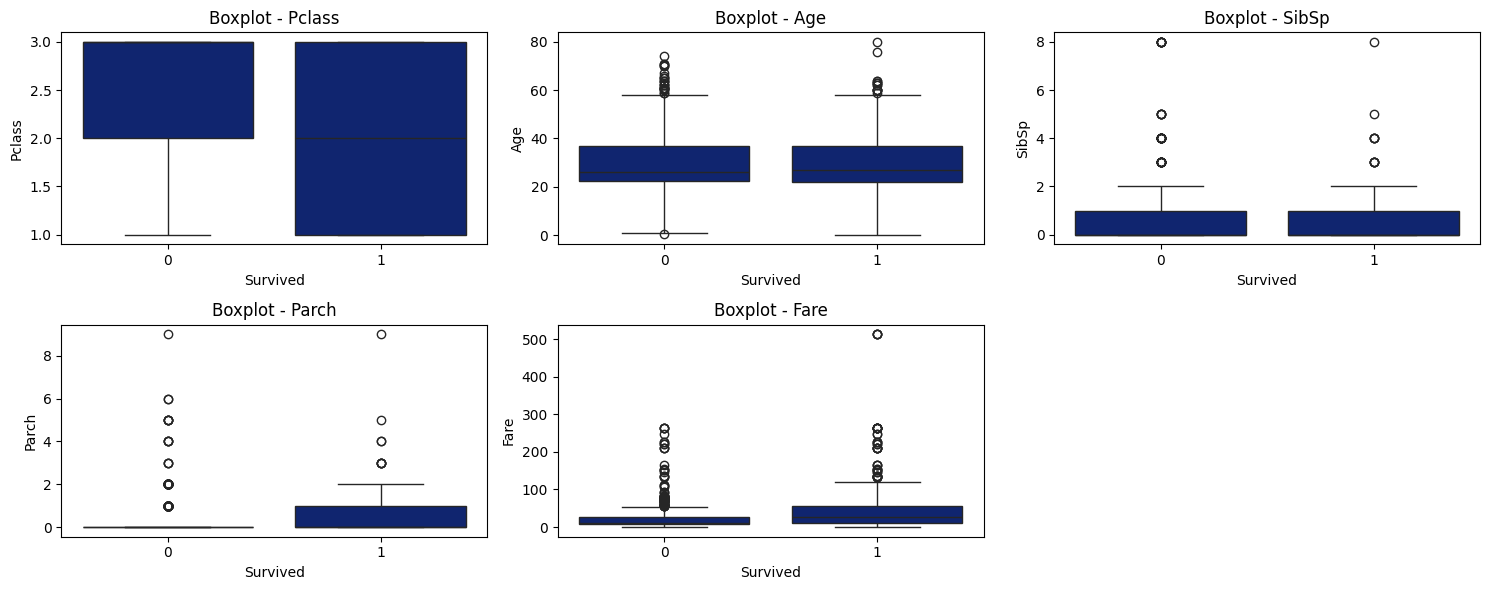

In [197]:
# Boxplot com todas as classes numéricas do dataset

cols_numericas = base.select_dtypes(include=['int64', 'float64']).columns
cols_numericas = cols_numericas.drop(['Survived','PassengerId'])

n = len(cols_numericas)
cols = 3
rows = (n//cols) + (1 if n % cols != 0 else 0)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3))
axes = axes.flatten()

for i, col in enumerate(cols_numericas):
  sns.boxplot(data=base, x='Survived', y=col, ax=axes[i])
  axes[i].set_title(f'Boxplot - {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Aplicando o Machine Learn nos dados analisados

In [198]:
base.head()

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",Mr,male,35.0,0,0,373450,8.0500,S


In [199]:
# Criando uma cópia do DataSet original para poder-mos trabalhar com o ML
colunas_drop = ['PassengerId','Name','Title','Ticket']
df_titanic = base.copy()
df_titanic.drop(colunas_drop, axis=1, inplace=True)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [200]:
# Criamos uma nova variável chamada IsMale onde 1 significa que é Masculino e 0 Feminino (fazemos isso, pois os modelos de ML trabalham melhor com números)
df_titanic['IsMale'] = df_titanic['Sex'].map({'male':1, 'female':0})
df_titanic.drop('Sex', axis=1, inplace=True)

# Fazemos o OneHotEncoder para transformar a variavel Embarked em 3 novas variáveis correspondendo cada uma a um Porto de embarque
encoder = OneHotEncoder()
dummies = encoder.fit_transform(df_titanic[['Embarked']])
df_dummies = pd.DataFrame(dummies.toarray(), columns=encoder.get_feature_names_out())
df_titanic = pd.concat([df_titanic, df_dummies], axis=1)
df_titanic.drop('Embarked', axis=1, inplace=True)
df_titanic.drop(['Embarked_C','Embarked_Q','Embarked_S'], axis=1, inplace=True) # Testando se a acurácia aumenta retirando essas variáveis


In [201]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [202]:
# Pegamos as variáveis X e y para utilizar no modelo
X = df_titanic.drop('Survived', axis=1)
y = df_titanic['Survived']

In [203]:
# Dividimos o testes entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [204]:
# Criamos um dicionario com os modelos que queremos avaliar
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}


resultados = {}


# Fazemos um Pipeline transformando primeiro os dados em uma única escala e depois treinamos cada modelo
for nome, modelo in modelos.items():
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('modelo', modelo)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nome] = acc


In [205]:
# Resultado de cada modelo baseado em sua acurácia
for nome , acc in resultados.items():
  print(f'{nome}: {acc}')


Logistic Regression: 0.8625954198473282
Random Forest: 0.8575063613231552
KNN: 0.8422391857506362
SVM: 0.8702290076335878


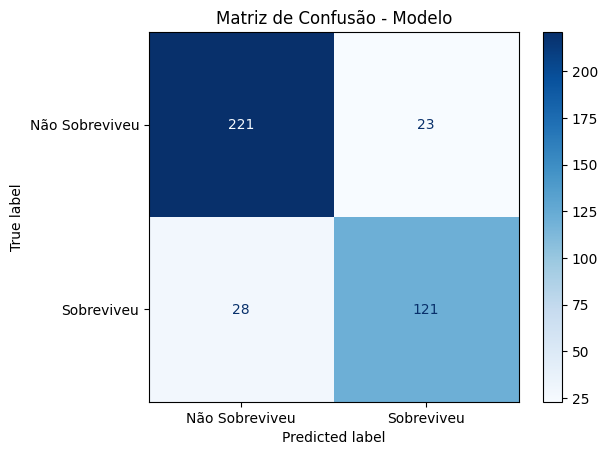

In [206]:
# confusion matrix do modelo SVM (melhor avaliado)
matriz = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['Não Sobreviveu', 'Sobreviveu'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Modelo')
plt.show()

In [207]:
# Iremos usar o cross_validation para comparar os resultados
for nome, modelo in modelos.items():
  pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('modelo', modelo)
    ])
  scores = cross_val_score(pipeline, X, y, cv=5)
  print(f'{nome}: {scores.mean()}')

# Vemos que o SVM (Suport Vector Machine) é o melhor modelo

Logistic Regression: 0.8472960720657483
Random Forest: 0.8342517036647072
KNN: 0.8304232107864642
SVM: 0.8694393261384574


In [208]:
# Report com as métricas do melhor modelo (SVM)
print(classification_report(y_test, y_pred, target_names=["Não Sobreviveu", "Sobreviveu"]))

                precision    recall  f1-score   support

Não Sobreviveu       0.89      0.91      0.90       244
    Sobreviveu       0.84      0.81      0.83       149

      accuracy                           0.87       393
     macro avg       0.86      0.86      0.86       393
  weighted avg       0.87      0.87      0.87       393

